<a href="https://colab.research.google.com/github/lfnd0/Machine_Learning/blob/master/ML_Atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando dados sobre câncer de próstata
> Dataset: [Prostate cancer](https://www.kaggle.com/sajidsaifi/prostate-cancer)

## 1. Apresentação parcial dos dados e colunas do dataset



In [121]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [122]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/Machine_Learning/Datasets/Atividade_1/ca_prostata.csv')
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [123]:
data.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

## 2. Limpeza e organização dos dados

In [124]:
data = data.dropna()

In [125]:
data = data.drop(columns=['id'])
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [126]:
data['diagnosis_result'] = data['diagnosis_result'].replace(['B', 'M'], [0, 1])
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


## 3. Análise preliminar dos dados

### 3.1 Histograma

#### 3.1.1 Ocorrência de tumores benignos (0) e malignos (1)

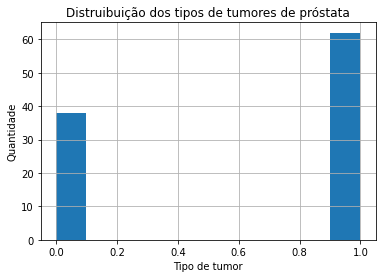

In [127]:
import matplotlib.pyplot as plt

plt.hist(data['diagnosis_result'])
plt.title('Distruibuição dos tipos de tumores de próstata')
plt.xlabel('Tipo de tumor')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()

#### 3.1.2 Ocorrência do atributo área

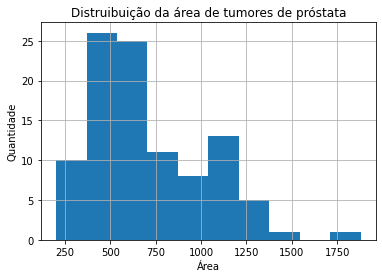

In [128]:
plt.hist(data['area'])
plt.title('Distruibuição da área de tumores de próstata')
plt.xlabel('Área')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()

### 3.2 Quantidade dos tipos de tumores de próstata

#### 3.2.1 Benignos

In [129]:
print('Quantidade de tumores benignos: ', data[data['diagnosis_result'] == 0].shape[0])

Quantidade de tumores benignos:  38


#### 3.2.2 Malignos

In [130]:
print('Quantidade de tumores malignos: ', data[data['diagnosis_result'] == 1].shape[0])

Quantidade de tumores malignos:  62


### 3.3 Distribuição de probabilidade

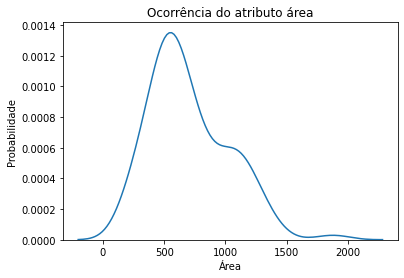

In [131]:
import seaborn as sns

sns.distplot(data.area, hist = False, rug = False)
plt.title('Ocorrência do atributo área')
plt.xlabel('Área')
plt.ylabel('Probabilidade')
plt.show()

### 3.4 Diagrama de caixa (*boxplot*)

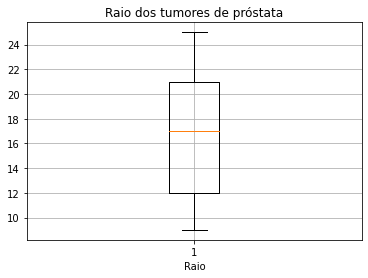

In [132]:
plt.boxplot(data.radius)
plt.title('Raio dos tumores de próstata')
plt.xlabel('Raio')
plt.grid()
plt.show()

### 3.5 Análise comparativa dos atributos entre os tipos de tumores

#### 3.5.1 Diagrama de caixa para tumores benignos

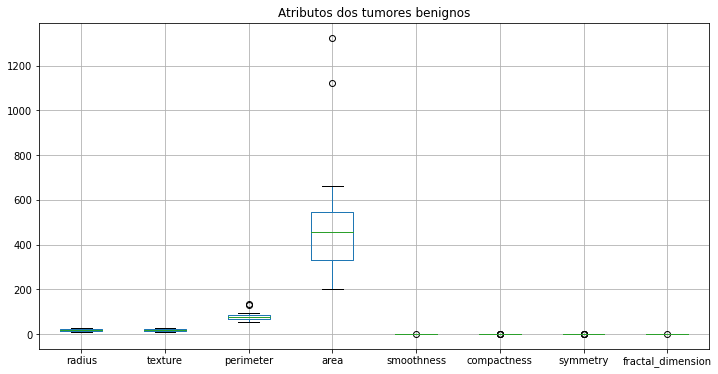

In [134]:
benigno = data[data['diagnosis_result'] == 0].drop(columns=['diagnosis_result']).reset_index(drop=True)
plt.figure(figsize = (12, 6))
benigno.boxplot()
plt.title('Atributos dos tumores benignos')
plt.show()

#### 3.5.2 Diagrama de caixa para tumores malignos

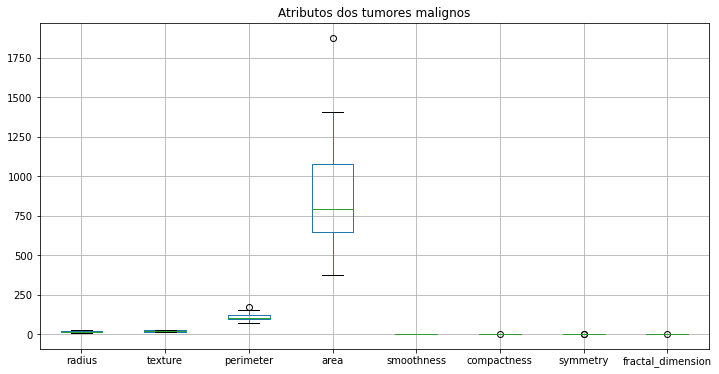

In [135]:
maligno = data[data['diagnosis_result'] == 1].drop(columns=['diagnosis_result']).reset_index(drop=True)
plt.figure(figsize = (12, 6))
maligno.boxplot()
plt.title('Atributos dos tumores malignos')
plt.show()

#### 3.5.3 Comparação da área de tumores benignos e malignos

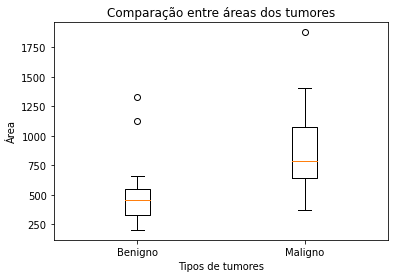

In [136]:
plt.boxplot([benigno.area, maligno.area], labels = ['Benigno','Maligno'])
plt.title('Comparação entre áreas dos tumores')
plt.xlabel('Tipos de tumores')
plt.ylabel('Área')
plt.show()

#### 3.5.4 Distribuição de probabilidade usando a área dos tipos de tumores

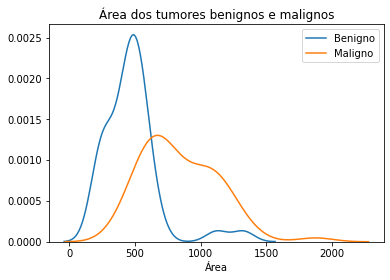

In [137]:
sns.distplot(benigno.area, hist = False, rug = False, label = 'Benigno')
sns.distplot(maligno.area, hist = False, rug = False, label = 'Maligno')
plt.title('Área dos tumores benignos e malignos')
plt.xlabel('Área')
plt.show()

## 3.6 Análise estatística dos dados

#### 3.6.1 Média

In [138]:
benigno.mean()

radius                17.947368
texture               17.763158
perimeter             78.500000
area                 474.342105
smoothness             0.099053
compactness            0.086895
symmetry               0.184053
fractal_dimension      0.064605
dtype: float64

In [139]:
maligno.mean()

radius                16.177419
texture               18.516129
perimeter            107.983871
area                 842.951613
smoothness             0.104984
compactness            0.151097
symmetry               0.198758
fractal_dimension      0.064742
dtype: float64

#### 3.6.2 Desvio padrão

In [140]:
benigno.std()

radius                 5.061499
texture                5.185396
perimeter             17.478558
area                 219.603731
smoothness             0.015194
compactness            0.042450
symmetry               0.029971
fractal_dimension      0.007810
dtype: float64

In [141]:
maligno.std()

radius                 4.678252
texture                5.218950
perimeter             19.715594
area                 290.103680
smoothness             0.013940
compactness            0.058159
symmetry               0.030162
fractal_dimension      0.008415
dtype: float64

#### 3.6.3 Mediana

In [142]:
benigno.median()

radius                18.0000
texture               17.0000
perimeter             78.5000
area                 458.5000
smoothness             0.0980
compactness            0.0785
symmetry               0.1820
fractal_dimension      0.0635
dtype: float64

In [143]:
maligno.median()

radius                16.0000
texture               18.0000
perimeter            104.0000
area                 790.5000
smoothness             0.1045
compactness            0.1405
symmetry               0.1930
fractal_dimension      0.0630
dtype: float64

#### 3.6.4 Gráfico de barras comparando a média e desvio padrão da área dos tipos de tumores

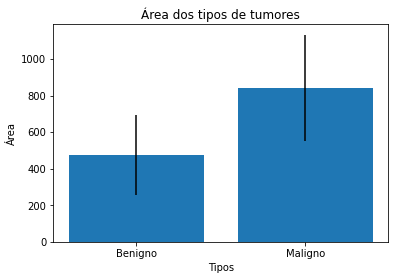

In [144]:
plt.bar(['Benigno', 'Maligno'], [benigno.area.mean(), maligno.area.mean()], yerr = [benigno.area.std(), maligno.area.std()])
plt.title('Área dos tipos de tumores')
plt.xlabel('Tipos')
plt.ylabel('Área')
plt.show()

### 3.7 Correlação entre atributos

#### 3.7.1 Correção entre todos os atributos

In [149]:
result = data.corr()
result

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
diagnosis_result,1.000000,-0.176967,0.070735,0.607498,0.562444,0.197616,0.512234,0.233028,0.008180
radius,-0.176967,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120
texture,0.070735,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157
perimeter,0.607498,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434
area,0.562444,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344
smoothness,0.197616,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580
compactness,0.512234,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953
symmetry,0.233028,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608
fractal_dimension,0.008180,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000


#### 3.7.2 Perímeto x Área

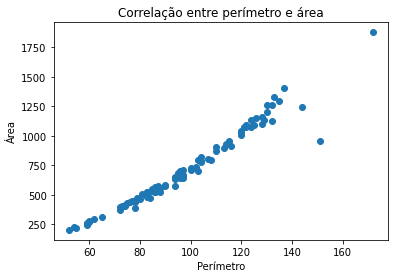

In [147]:
plt.scatter(data.perimeter, data.area)
plt.title('Correlação entre perímetro e área')
plt.xlabel('Perímetro')
plt.ylabel('Área')
plt.show()

#### 3.7.3 Raio x Textura

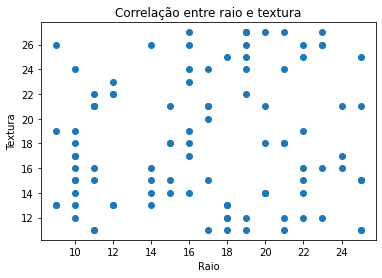

In [152]:
plt.scatter(data.radius, data.texture)
plt.title('Correlação entre raio e textura')
plt.xlabel('Raio')
plt.ylabel('Textura')
plt.show()

#### 3.7.4 Mapa de calor (*heatmap*)

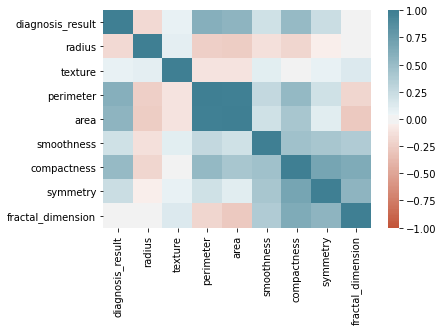

In [154]:
sns.heatmap(result, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 220, n = 200))

## 4. Re-escala de dados usando média e desvio padrão

#### 4.1 Raio e textura

In [ ]:
raio = data.radius
textura = data.texture

In [156]:
raio = (raio - raio.mean()) / raio.std()

In [157]:
textura = (textura - textura.mean()) / textura.std()

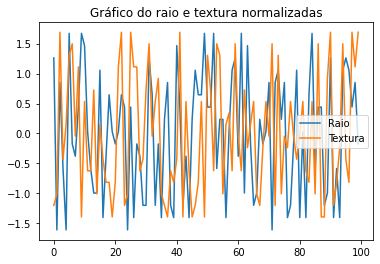

In [167]:
plt.title('Gráfico do raio e textura normalizadas')
plt.plot(raio, label = 'Raio')
plt.plot(textura, label = 'Textura')
plt.legend()
plt.show()

4.2 Perímetro e área

In [155]:
perimetro = data.perimeter
area = data.area

In [158]:
perimetro = (perimetro - perimetro.mean()) / perimetro.std()

In [159]:
area = (area - area.mean()) / area.std()

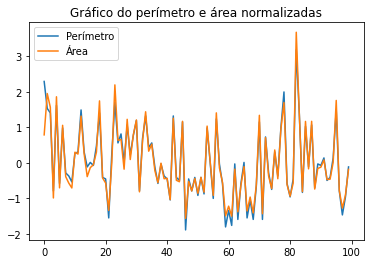

In [166]:
plt.title('Gráfico do perímetro e área normalizadas')
plt.plot(perimetro, label = 'Perímetro')
plt.plot(area, label = 'Área')
plt.legend()
plt.show()

#### 4.3 Textura e área

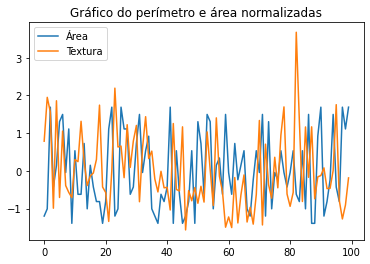

In [165]:
plt.title('Gráfico do perímetro e área normalizadas')
plt.plot(textura, label = 'Área')
plt.plot(area, label = 'Textura')
plt.legend()
plt.show()

## 5. Considerações
Diante dos dados analisados e das suas prováveis correlações, pôde-se perceber:

* Tumores do tipo maligno tendem a ter áreas médias maiores que ~430 (Subseção 3.6.4).
* Os atributos área/perímetro possuem uma correlação considerável (Subseções 3.7.1, 3.7.2, 3.7.4, 4.2).
* Os atributos raio/textura e área/textura não possuem correlação considerável (Subseções 3.7.3, 3.7.4, 4.3).